In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()

## Import preprocessed data

In [2]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [3]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [4]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x0_2nd Cycle', 'x0_Graduation', 'x0_Master', 'x0_PhD', 'x1_Married',
       'x1_Single', 'x1_Together', 'x1_Widow', 'x2_M', 'x3_1.0',
       'x4_Kind of OK', 'x4_Meh...', 'x4_OK nice!', 'x4_Take my money!!',
       'PC0', 'PC1', 'PC2'],
      dtype='object')

In [5]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## K-Means Clustering
What is K-Means clustering? How does it work?

### How is it computed?
![](../figures/kmeans.png)

### Characteristics:
- *Number of clusters* need to be set apriori
- One of the *fastest* clustering algorithms
- The results *depend on the initialization* (stochastic)
- Prone to *local optima*
- Favors *convex* (round shape) and *isotropic* (same shape) clusters

### How to apply K-Means clustering?

In [23]:
kmclust = KMeans(init='random')
# the fit method
kmclust.fit(df[metric_features])

KMeans(init='random')

In [24]:
# the predict method
kmclust.predict(df[metric_features])

array([5, 5, 6, ..., 0, 2, 3])

In [25]:
#shape
kmclust.predict(df[metric_features]).shape

(8817,)

In [26]:
# the transform method
pd.DataFrame(kmclust.transform(df[metric_features]))

,0,1,2,3,4,5,6,7
0,3.711456,3.759909,2.169969,3.241537,4.132566,1.192975,5.329967,3.821215
1,4.080085,5.157622,3.253974,3.662634,3.719209,1.892137,6.485835,4.421868
2,3.613456,3.143949,4.359672,5.718032,4.828696,5.600580,2.705405,4.206041
3,3.220809,4.406440,2.469017,2.220290,2.397922,2.677062,5.083068,3.425108
4,3.362191,4.327808,2.633519,1.486652,2.642062,1.956723,5.580814,3.351321
...,...,...,...,...,...,...,...,...
8812,3.058265,4.334605,2.993641,2.363798,2.649893,3.029441,5.270016,3.683954
8813,3.841356,5.080936,3.844878,1.941205,2.778269,3.601635,6.057766,3.966995
8814,1.403285,2.997466,3.918384,4.245437,2.404553,4.496518,4.044470,3.012309
8815,3.145240,3.030028,2.489243,3.061005,3.671229,2.557435,4.408728,3.176944


### How can we improve the initialization step?

In [27]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

KMeans(n_init=15, random_state=1)

In [30]:
kmclust.predict(df[metric_features])

array([4, 4, 7, ..., 6, 2, 0])

*init='k-means++'* initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization. *n_init=K* allows to initialize KMeans K times and pick the best clustering in terms of Inertia. This can been shown in the link below.

**Empirical evaluation of the impact of k-means initialization:**

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

### Defining the number of clusters:

In [44]:
"""we can use hierarquical cluster and defininf the numbers of cluster from the dendogram"""

range_clusters = range(1,15)

In [45]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    # fit the clusterer
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

In [46]:
len(inertia)

14

**Inertia (within-cluster sum-of-squares distance) Formula:**
$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

$C$: Set of identified clusters.

$n_j$: Set of observations belonging to cluster $j$.

$x_i$: Observation $i$.

$\mu_j$: Centroid of cluster $j$.

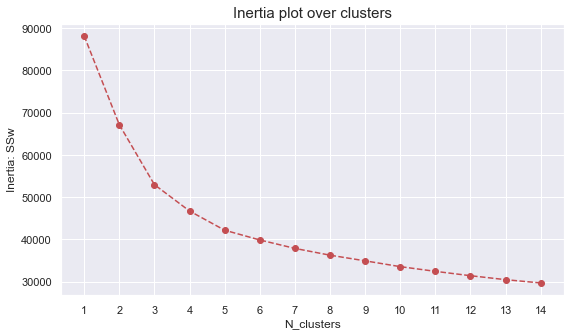

In [56]:
# The inertia plot
plt.figure(figsize=(9,5))
# plt.plot(inertia)
x = range(1,15)
xi = list(range(len(x)))
y = inertia
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square')

plt.xlabel('N_clusters')
plt.ylabel('Inertia: SSw') 
plt.xticks(xi, x)
plt.title("Inertia plot over clusters", size=15)
plt.show()

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

For n_clusters = 2, the average silhouette_score is : 0.2216925624241448
For n_clusters = 3, the average silhouette_score is : 0.23707766584584286
For n_clusters = 4, the average silhouette_score is : 0.21036821905415626
For n_clusters = 5, the average silhouette_score is : 0.19514283937028068
For n_clusters = 6, the average silhouette_score is : 0.18736793579734382
For n_clusters = 7, the average silhouette_score is : 0.16983500681630878
For n_clusters = 8, the average silhouette_score is : 0.16670886503251847
For n_clusters = 9, the average silhouette_score is : 0.1549596056099329
For n_clusters = 10, the average silhouette_score is : 0.15066928575504182
For n_clusters = 11, the average silhouette_score is : 0.14808020070121977
For n_clusters = 12, the average silhouette_score is : 0.14847880590855292
For n_clusters = 13, the average silhouette_score is : 0.14905708672852924
For n_clusters = 14, the average silhouette_score is : 0.15283070598813156


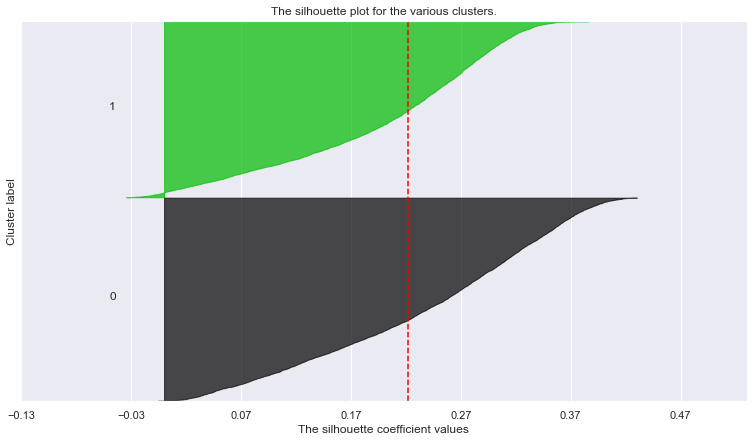

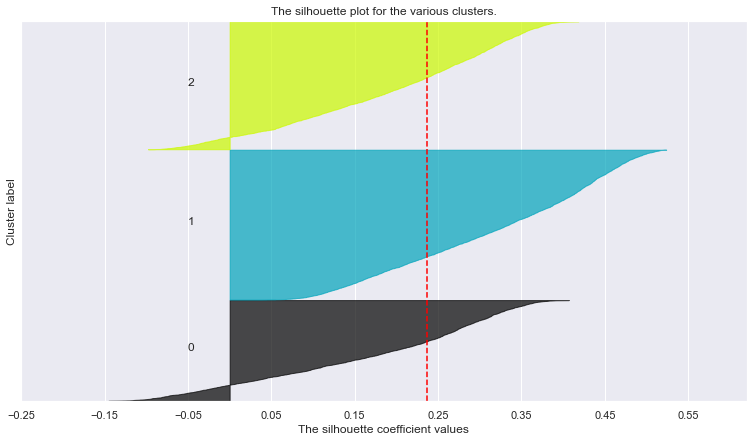

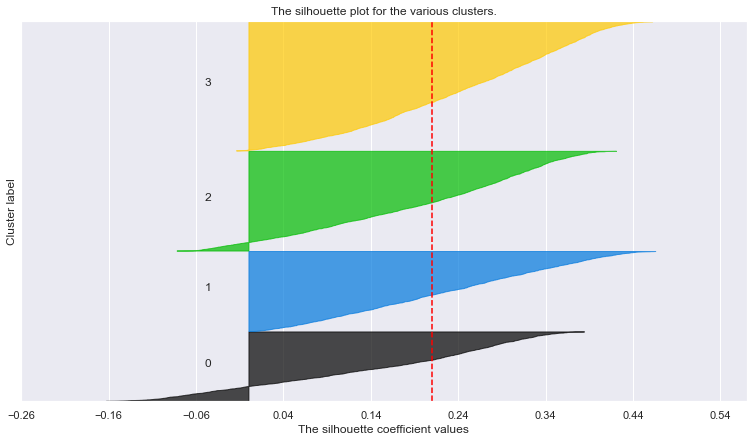

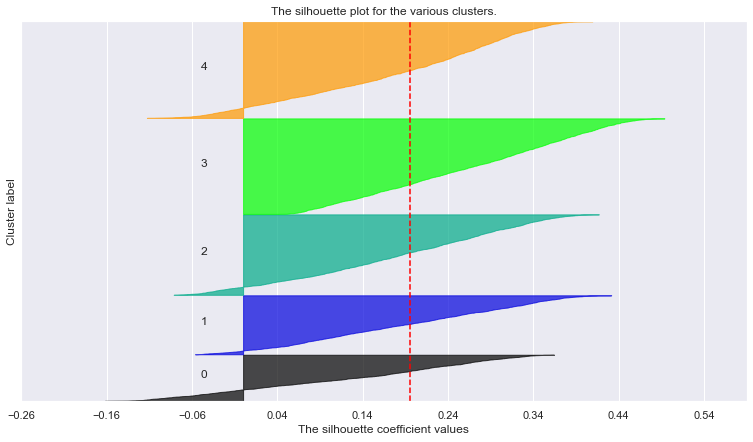

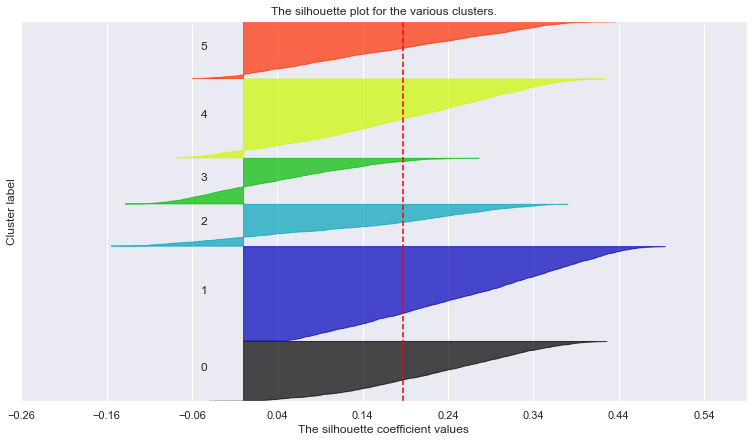

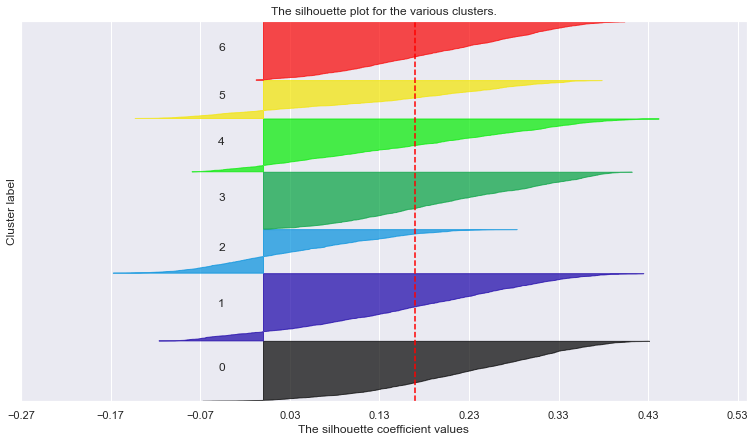

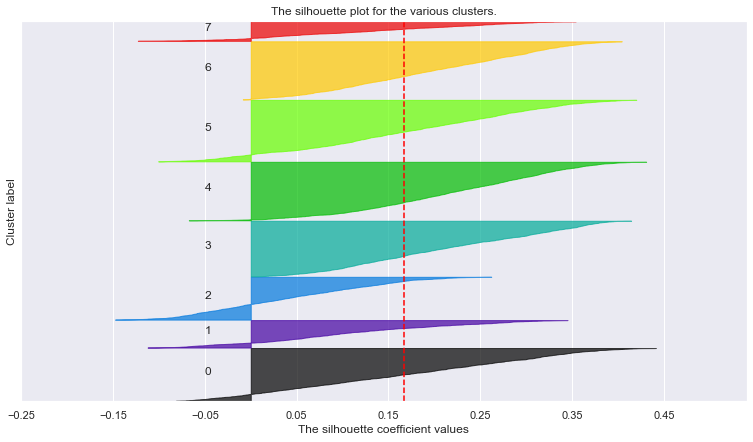

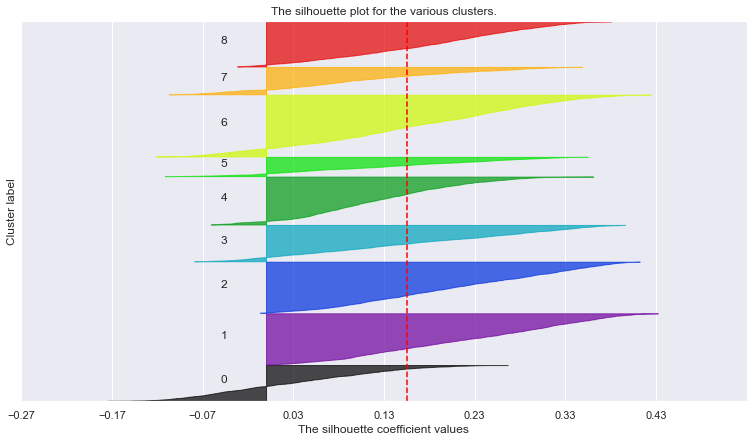

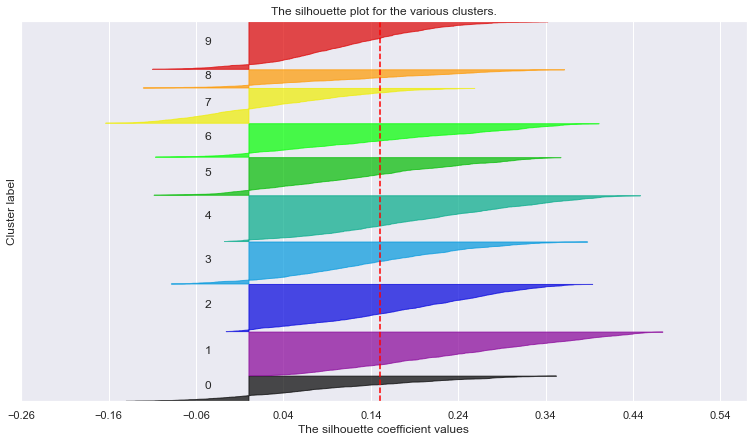

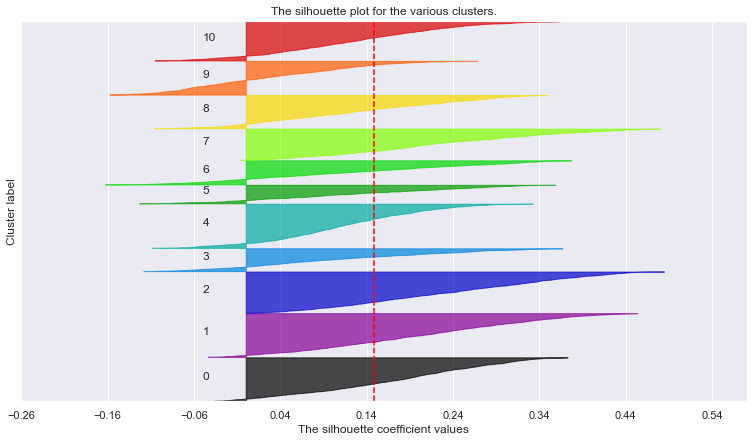

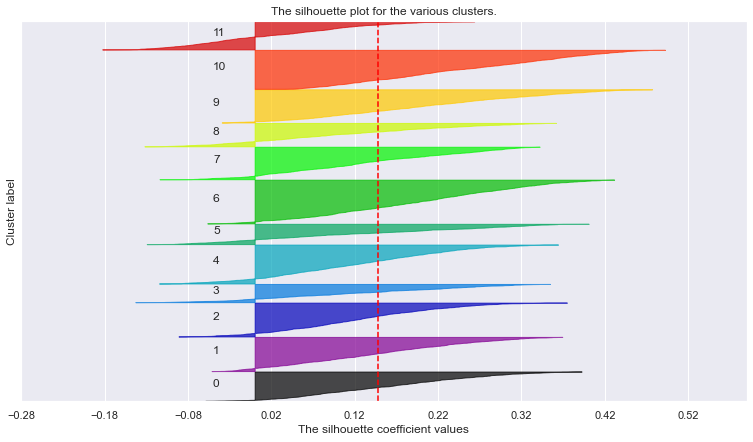

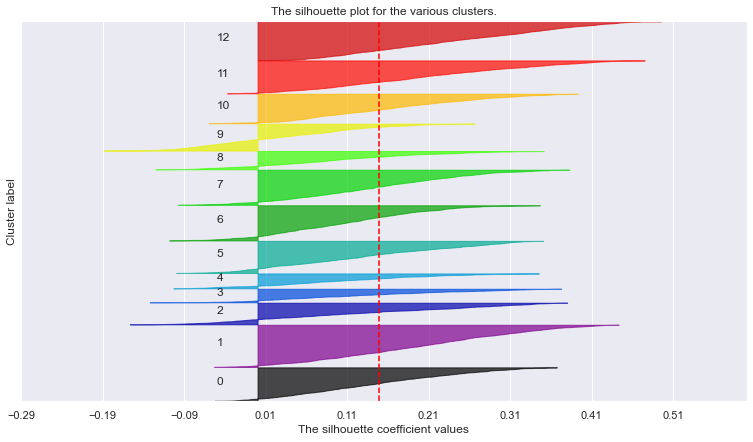

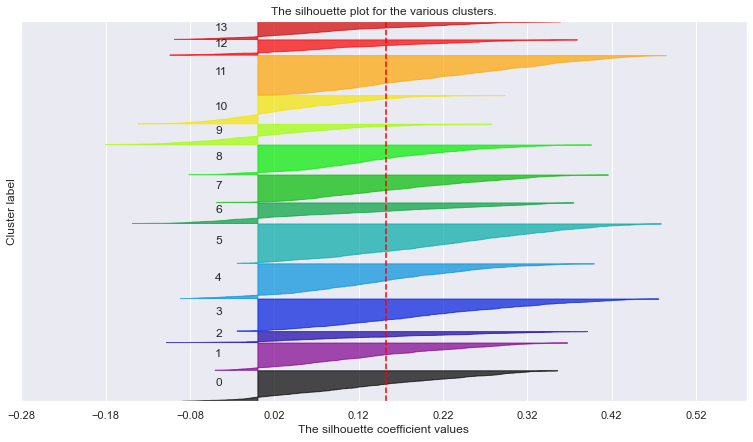

In [59]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg =  silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values =  silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

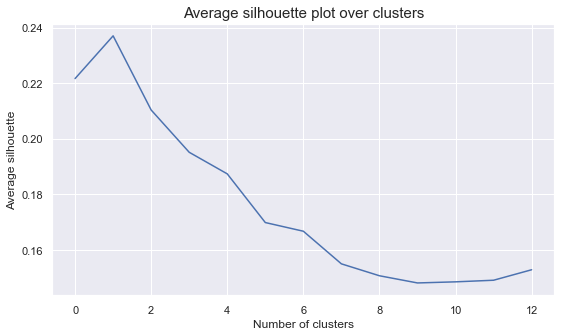

In [60]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### Final KMeans clustering solution

In [63]:
# final cluster solution
number_clusters =  3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df[metric_features])
km_labels

array([2, 2, 0, ..., 1, 2, 2])

In [64]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,-1.046753,-0.846839,0.106507,-1.036292,0.812795,0.472976,0.817424,0.835083,0.697810,-0.769234,...,0.008948,0.652748,0.842778,0.328504,0.334470,0.325096,0.001278,-2.480245,0.110876,0.043692
1,-0.194692,-0.335311,-0.009968,0.891570,-0.578927,-0.635109,-0.585195,-0.563728,0.409679,-0.068841,...,0.024355,0.640115,0.936676,0.298567,0.285100,0.349857,0.062178,0.660500,-1.437224,0.071740
2,1.052418,1.059654,-0.072209,-0.227987,0.037861,0.371294,0.041556,0.002507,-1.029376,0.686459,...,0.110403,0.640268,0.360738,0.080537,0.087584,0.463423,0.368456,1.179863,1.595868,-0.118429


### How can we combine the 2 algorithms?

## Exercise:
**Apply Hierarchical Clustering and K-means on the Principal Components.**

Choose the appropriate parameters and number of clusters for each algorithm and interpret each cluster based on the Principal Components interpretation:

In [65]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#### defining n_clusters for HC

In [67]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[pc_features])

array([7923, 6285, 7894, ...,    3,    1,    0], dtype=int64)

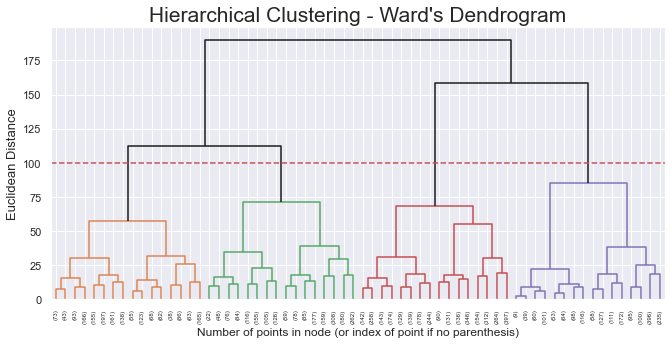

In [68]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [69]:
# Performing Hierarquical Clustering
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4)
hc_labels = hclust.fit_predict(df[pc_features])
hc_labels

array([1, 3, 0, ..., 2, 2, 3], dtype=int64)

In [70]:
# Characterizing the clusters obtained by HC
df_concat_HC = pd.concat((df, pd.Series(hc_labels, name='labels_HC')), axis=1)
df_concat_HC.groupby('labels_HC').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
labels_HC,,,,,,,,,,,,,,,,,,,,,
0,-1.153792,-0.884991,0.159331,-1.162869,0.886690,0.582449,0.869101,0.918325,0.776218,-0.815564,...,0.010360,0.654853,0.848964,0.332606,0.337514,0.318430,0.000000,-2.710339,0.159114,-0.010116
1,0.865716,0.706785,-0.130536,-0.655051,0.399316,0.532980,0.434908,0.324743,-1.040116,0.233455,...,0.101471,0.641667,0.353922,0.137255,0.139216,0.430882,0.291176,0.265741,1.835664,-0.108670
2,-0.362328,-0.555557,0.066070,0.665485,-0.499193,-0.364057,-0.504444,-0.476123,0.445661,-0.399123,...,0.023170,0.641335,0.936979,0.329935,0.318505,0.337967,0.008650,0.158334,-1.416711,-0.206995
3,0.892643,1.160357,-0.140555,0.770711,-0.483531,-0.572708,-0.497221,-0.472141,-0.436315,1.354899,...,0.078546,0.637749,0.592028,0.055686,0.062720,0.473623,0.407972,2.295500,0.321994,0.533577


In [ ]:
"""não usar PCA e metric features porque eles tem alta colinearidade entre elas, 
já que PCA são baseadas na variância das metric features.
O ideal é testar a clusterização separadamente em cada set de features e comparar os resultados.
Não é muito comum utilizar as variáveis categóricas em Clustering K-means ou Hierarquical já que os algoritmos
são baseados em cálculo de distâncias (Euclidean) e isso se aplica às variáveis contínuas.
K-Modes pode ser aplicado para considerar as variáveis categóricas
"""